In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statistics
import math
from fractions import Fraction
import plotly.express as px


# Set the seed
np.random.seed(42)  
random.seed(42)

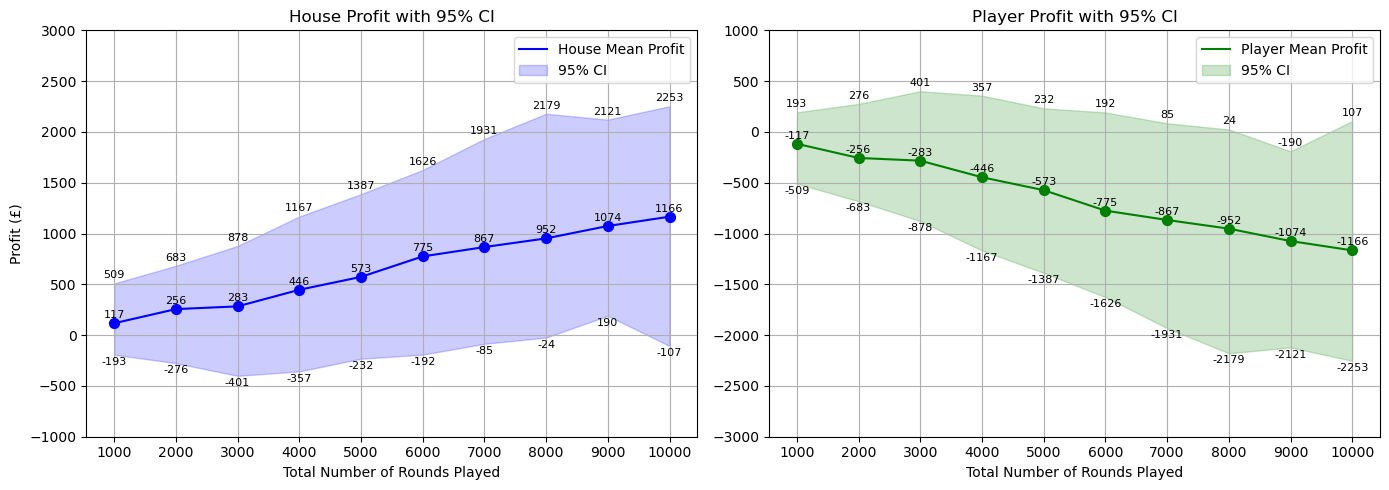

In [3]:
outcomes = ["house", "player", "charity", "jackpot"]
probabilities = [0.51, 0.49, 0, 0]  # Outcome probabilities
num_rounds = list(range(1, 11))  # How number of rounds affects p/l
num_players = 1000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs
jackpot_val = 100

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(num_rounds)))
player_value = np.zeros((num_simulations, len(num_rounds)))
charity_value = np.zeros((num_simulations, len(num_rounds)))

for sim in range(num_simulations):
    for r_idx, rounds in enumerate(num_rounds):
        # Generate all bets for all players across all rounds at once
        bet_vals = np.random.uniform(2, 10, (rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate all outcomes in one go
        outcomes_idx = np.random.choice(len(outcomes), size=(rounds, num_players), p=probabilities)

        # Vectorized profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2) 
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Define total trials (rounds × players)
total_rounds = [r * num_players for r in num_rounds]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot house mean profit
axes[0].plot(total_rounds, house_mean, label="House Mean Profit", color="blue")
axes[0].fill_between(total_rounds, house_ci_lower, house_ci_upper, color="blue", alpha=0.2, label="95% CI")
axes[0].scatter(total_rounds, house_mean, color="blue", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, house_mean, house_ci_lower, house_ci_upper):
    axes[0].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[0].set_xticks(total_rounds)
axes[0].set_yticks(np.arange(-1000, 3500, 500))
axes[0].set_title("House Profit with 95% CI")
axes[0].set_xlabel("Total Number of Rounds Played")
axes[0].set_ylabel("Profit (£)")
axes[0].legend()
axes[0].grid(True)

# Plot player mean profit
axes[1].plot(total_rounds, player_mean, label="Player Mean Profit", color="green")
axes[1].fill_between(total_rounds, player_ci_lower, player_ci_upper, color="green", alpha=0.2, label="95% CI")
axes[1].scatter(total_rounds, player_mean, color="green", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, player_mean, player_ci_lower, player_ci_upper):
    axes[1].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[1].set_xticks(total_rounds)
axes[1].set_yticks(np.arange(-3000, 1500, 500))
axes[1].set_title("Player Profit with 95% CI")
axes[1].set_xlabel("Total Number of Rounds Played")
axes[1].legend()
axes[1].grid(True)

plt.savefig("PnL1.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

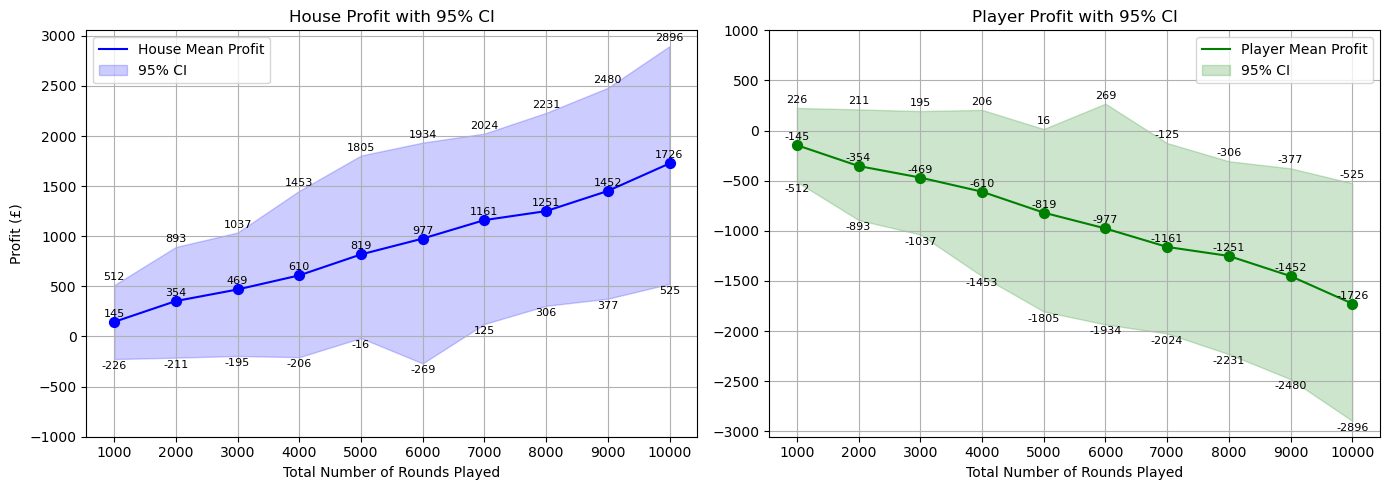

In [8]:
outcomes = ["house", "player", "charity", "jackpot"]
probabilities = [0.5135, 0.4865, 0, 0]  # Outcome probabilities
num_rounds = list(range(1, 11))  # How number of rounds affects p/l
num_players = 1000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs
jackpot_val = 100

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(num_rounds)))
player_value = np.zeros((num_simulations, len(num_rounds)))
charity_value = np.zeros((num_simulations, len(num_rounds)))

for sim in range(num_simulations):
    for r_idx, rounds in enumerate(num_rounds):
        # Generate all bets for all players across all rounds at once
        bet_vals = np.random.uniform(2, 10, (rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate all outcomes in one go
        outcomes_idx = np.random.choice(len(outcomes), size=(rounds, num_players), p=probabilities)

        # Vectorized profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2) 
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Define total trials (rounds × players)
total_rounds = [r * num_players for r in num_rounds]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot house mean profit
axes[0].plot(total_rounds, house_mean, label="House Mean Profit", color="blue")
axes[0].fill_between(total_rounds, house_ci_lower, house_ci_upper, color="blue", alpha=0.2, label="95% CI")
axes[0].scatter(total_rounds, house_mean, color="blue", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, house_mean, house_ci_lower, house_ci_upper):
    axes[0].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[0].set_xticks(total_rounds)
axes[0].set_yticks(np.arange(-1000, 3500, 500))
axes[0].set_title("House Profit with 95% CI")
axes[0].set_xlabel("Total Number of Rounds Played")
axes[0].set_ylabel("Profit (£)")
axes[0].legend()
axes[0].grid(True)

# Plot player mean profit
axes[1].plot(total_rounds, player_mean, label="Player Mean Profit", color="green")
axes[1].fill_between(total_rounds, player_ci_lower, player_ci_upper, color="green", alpha=0.2, label="95% CI")
axes[1].scatter(total_rounds, player_mean, color="green", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, player_mean, player_ci_lower, player_ci_upper):
    axes[1].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[1].set_xticks(total_rounds)
axes[1].set_yticks(np.arange(-3000, 1500, 500))
axes[1].set_title("Player Profit with 95% CI")
axes[1].set_xlabel("Total Number of Rounds Played")
axes[1].legend()
axes[1].grid(True)

plt.savefig("PnL1.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

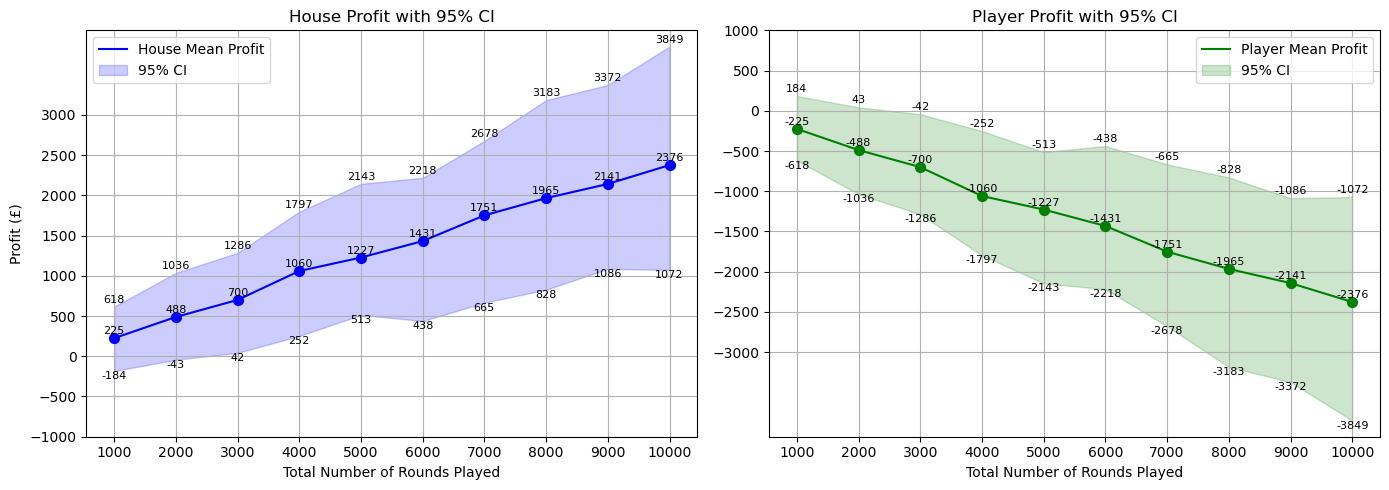

In [9]:
outcomes = ["house", "player", "charity", "jackpot"]
probabilities = [0.52, 0.48, 0, 0]  # Outcome probabilities
num_rounds = list(range(1, 11))  # How number of rounds affects p/l
num_players = 1000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs
jackpot_val = 100

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(num_rounds)))
player_value = np.zeros((num_simulations, len(num_rounds)))
charity_value = np.zeros((num_simulations, len(num_rounds)))

for sim in range(num_simulations):
    for r_idx, rounds in enumerate(num_rounds):
        # Generate all bets for all players across all rounds at once
        bet_vals = np.random.uniform(2, 10, (rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate all outcomes in one go
        outcomes_idx = np.random.choice(len(outcomes), size=(rounds, num_players), p=probabilities)

        # Vectorized profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2) 
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Define total trials (rounds × players)
total_rounds = [r * num_players for r in num_rounds]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot house mean profit
axes[0].plot(total_rounds, house_mean, label="House Mean Profit", color="blue")
axes[0].fill_between(total_rounds, house_ci_lower, house_ci_upper, color="blue", alpha=0.2, label="95% CI")
axes[0].scatter(total_rounds, house_mean, color="blue", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, house_mean, house_ci_lower, house_ci_upper):
    axes[0].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[0].set_xticks(total_rounds)
axes[0].set_yticks(np.arange(-1000, 3500, 500))
axes[0].set_title("House Profit with 95% CI")
axes[0].set_xlabel("Total Number of Rounds Played")
axes[0].set_ylabel("Profit (£)")
axes[0].legend()
axes[0].grid(True)

# Plot player mean profit
axes[1].plot(total_rounds, player_mean, label="Player Mean Profit", color="green")
axes[1].fill_between(total_rounds, player_ci_lower, player_ci_upper, color="green", alpha=0.2, label="95% CI")
axes[1].scatter(total_rounds, player_mean, color="green", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, player_mean, player_ci_lower, player_ci_upper):
    axes[1].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[1].set_xticks(total_rounds)
axes[1].set_yticks(np.arange(-3000, 1500, 500))
axes[1].set_title("Player Profit with 95% CI")
axes[1].set_xlabel("Total Number of Rounds Played")
axes[1].legend()
axes[1].grid(True)

plt.savefig("PnL1.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

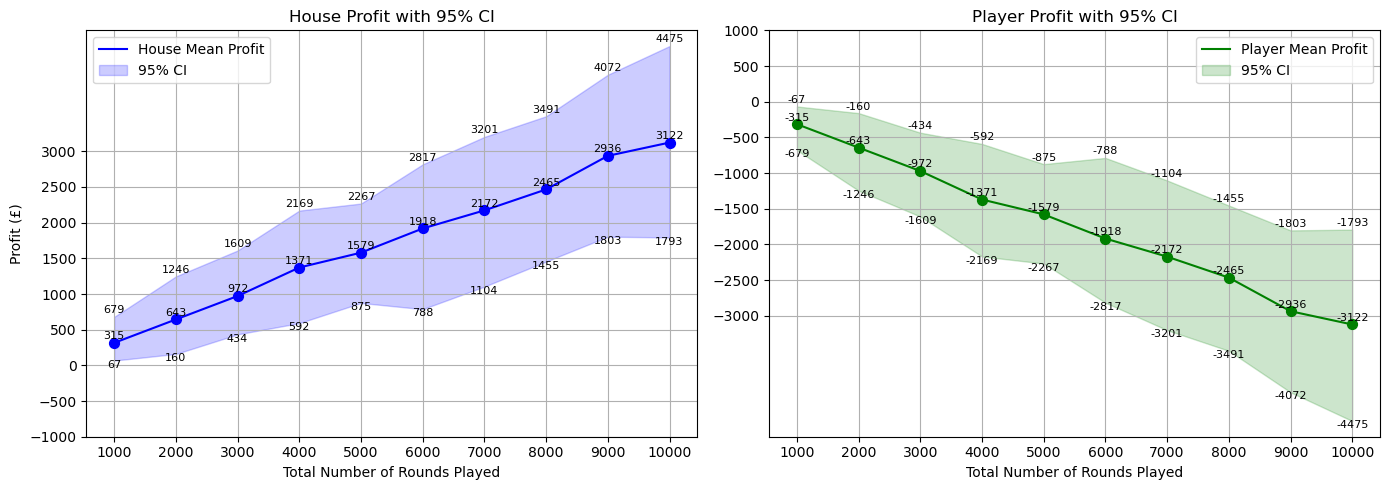

In [10]:
outcomes = ["house", "player", "charity", "jackpot"]
probabilities = [0.5263, 0.4737, 0, 0]  # Outcome probabilities
num_rounds = list(range(1, 11))  # How number of rounds affects p/l
num_players = 1000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs
jackpot_val = 100

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(num_rounds)))
player_value = np.zeros((num_simulations, len(num_rounds)))
charity_value = np.zeros((num_simulations, len(num_rounds)))

for sim in range(num_simulations):
    for r_idx, rounds in enumerate(num_rounds):
        # Generate all bets for all players across all rounds at once
        bet_vals = np.random.uniform(2, 10, (rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate all outcomes in one go
        outcomes_idx = np.random.choice(len(outcomes), size=(rounds, num_players), p=probabilities)

        # Vectorized profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2) 
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Define total trials (rounds × players)
total_rounds = [r * num_players for r in num_rounds]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot house mean profit
axes[0].plot(total_rounds, house_mean, label="House Mean Profit", color="blue")
axes[0].fill_between(total_rounds, house_ci_lower, house_ci_upper, color="blue", alpha=0.2, label="95% CI")
axes[0].scatter(total_rounds, house_mean, color="blue", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, house_mean, house_ci_lower, house_ci_upper):
    axes[0].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[0].set_xticks(total_rounds)
axes[0].set_yticks(np.arange(-1000, 3500, 500))
axes[0].set_title("House Profit with 95% CI")
axes[0].set_xlabel("Total Number of Rounds Played")
axes[0].set_ylabel("Profit (£)")
axes[0].legend()
axes[0].grid(True)

# Plot player mean profit
axes[1].plot(total_rounds, player_mean, label="Player Mean Profit", color="green")
axes[1].fill_between(total_rounds, player_ci_lower, player_ci_upper, color="green", alpha=0.2, label="95% CI")
axes[1].scatter(total_rounds, player_mean, color="green", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, player_mean, player_ci_lower, player_ci_upper):
    axes[1].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[1].set_xticks(total_rounds)
axes[1].set_yticks(np.arange(-3000, 1500, 500))
axes[1].set_title("Player Profit with 95% CI")
axes[1].set_xlabel("Total Number of Rounds Played")
axes[1].legend()
axes[1].grid(True)

plt.savefig("PnL1.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

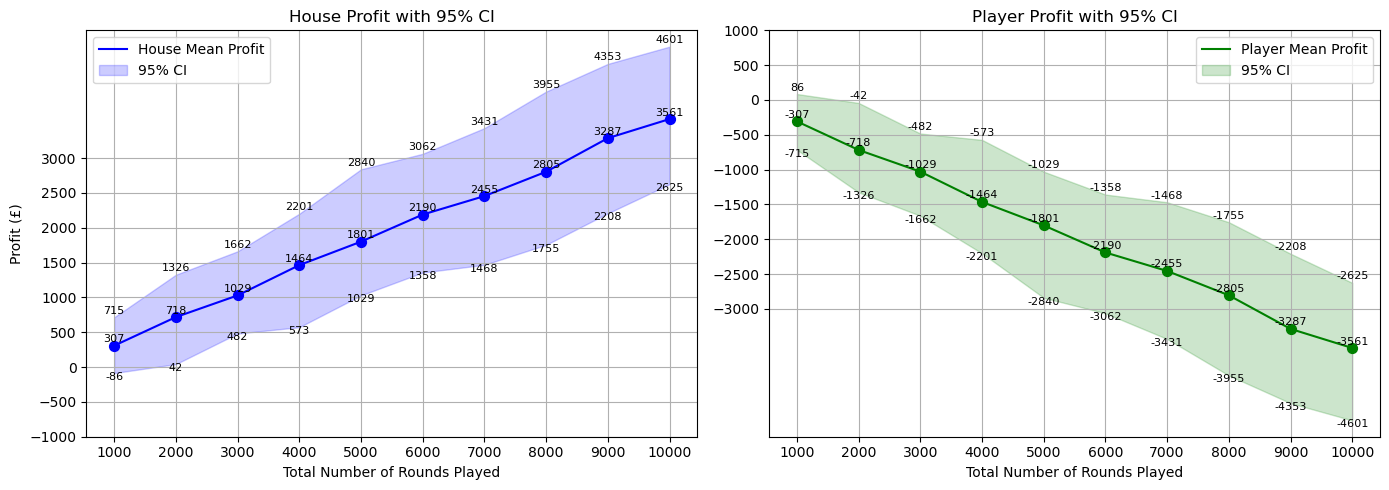

In [11]:
outcomes = ["house", "player", "charity", "jackpot"]
probabilities = [0.53, 0.47, 0, 0]  # Outcome probabilities
num_rounds = list(range(1, 11))  # How number of rounds affects p/l
num_players = 1000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs
jackpot_val = 100

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(num_rounds)))
player_value = np.zeros((num_simulations, len(num_rounds)))
charity_value = np.zeros((num_simulations, len(num_rounds)))

for sim in range(num_simulations):
    for r_idx, rounds in enumerate(num_rounds):
        # Generate all bets for all players across all rounds at once
        bet_vals = np.random.uniform(2, 10, (rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate all outcomes in one go
        outcomes_idx = np.random.choice(len(outcomes), size=(rounds, num_players), p=probabilities)

        # Vectorized profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2) 
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Define total trials (rounds × players)
total_rounds = [r * num_players for r in num_rounds]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot house mean profit
axes[0].plot(total_rounds, house_mean, label="House Mean Profit", color="blue")
axes[0].fill_between(total_rounds, house_ci_lower, house_ci_upper, color="blue", alpha=0.2, label="95% CI")
axes[0].scatter(total_rounds, house_mean, color="blue", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, house_mean, house_ci_lower, house_ci_upper):
    axes[0].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[0].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[0].set_xticks(total_rounds)
axes[0].set_yticks(np.arange(-1000, 3500, 500))
axes[0].set_title("House Profit with 95% CI")
axes[0].set_xlabel("Total Number of Rounds Played")
axes[0].set_ylabel("Profit (£)")
axes[0].legend()
axes[0].grid(True)

# Plot player mean profit
axes[1].plot(total_rounds, player_mean, label="Player Mean Profit", color="green")
axes[1].fill_between(total_rounds, player_ci_lower, player_ci_upper, color="green", alpha=0.2, label="95% CI")
axes[1].scatter(total_rounds, player_mean, color="green", s=50, zorder=3)

for xi, yi, lower, upper in zip(total_rounds, player_mean, player_ci_lower, player_ci_upper):
    axes[1].text(xi, yi + 50, f"{yi:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, upper + 50, f"{upper:.0f}", ha="center", fontsize=8, color="black")
    axes[1].text(xi, lower - 100, f"{lower:.0f}", ha="center", fontsize=8, color="black")

axes[1].set_xticks(total_rounds)
axes[1].set_yticks(np.arange(-3000, 1500, 500))
axes[1].set_title("Player Profit with 95% CI")
axes[1].set_xlabel("Total Number of Rounds Played")
axes[1].legend()
axes[1].grid(True)

plt.savefig("PnL1.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

In [14]:
prob_list = [] # Initialise list of probabilities
step = 0.001 # Set step value
p1_values = np.arange(0.51, 0.53 + step, step)

for p1 in p1_values:
    # p2 must be ≤ p1 and ≤ 1-p1
    max_p2 = min(0.55, p1, 1 - p1)
    min_p2 = 0.45
    p2_values = np.arange(min_p2, max_p2+step, step)
    for p2 in p2_values:
        p3 = round(1 - (p1 + p2), 3)
        if p3 >= 0:
            prob_list.append([round(p1,3), round(p2,3), p3, 0.0])

outcomes = ["house", "player", "charity", "jackpot"]
probabilities = prob_list  # Outcome probabilities
num_rounds = 3  # How number of rounds affects p/l
num_players = 10000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(prob_list)))
player_value = np.zeros((num_simulations, len(prob_list)))
charity_value = np.zeros((num_simulations, len(prob_list)))

for sim in range(num_simulations):
    for r_idx, probs in enumerate(prob_list):
        # Fixed number of rounds
        bet_vals = np.random.uniform(2, 10, (num_rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate outcomes
        outcomes_idx = np.random.choice(len(outcomes), size=(num_rounds, num_players), p=probs)

        # Profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2)
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 2].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Statistics for charity_value
charity_mean = np.mean(charity_value, axis=0).tolist()
charity_sd = np.std(charity_value, axis=0).tolist()
charity_var = np.var(charity_value, axis=0).tolist()
charity_ci_lower = np.percentile(charity_value, 2.5, axis=0)
charity_ci_upper = np.percentile(charity_value, 97.5, axis=0)

p1_vals = [p[0] for p in prob_list]  # house probability
p2_vals = [p[1] for p in prob_list]  # player probability

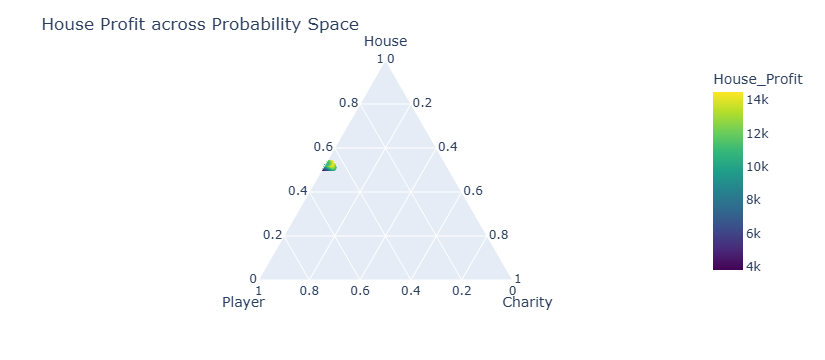

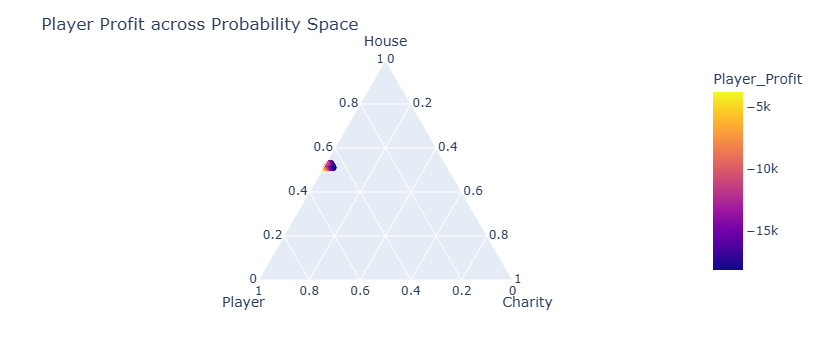

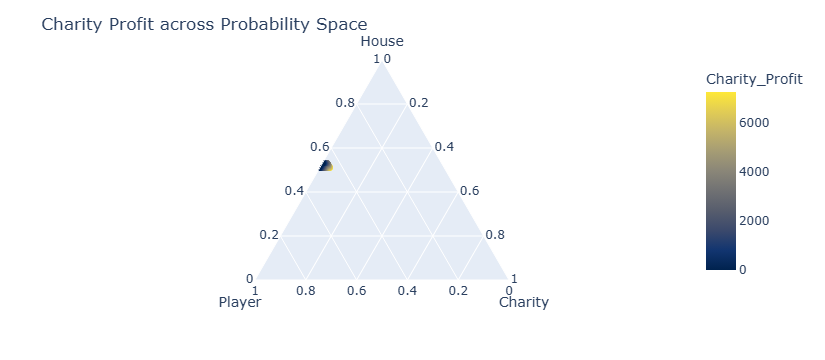

In [15]:
# Create DataFrame
df = pd.DataFrame(prob_list, columns=["House", "Player", "Charity", "Jackpot"])

# Add profit columns
df["House_Profit"] = house_mean
df["Player_Profit"] = player_mean
df["Charity_Profit"] = charity_mean

# Ternary Plot: House Profit
fig_house = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["House_Profit"].abs(),
    color="House_Profit",
    hover_data=["House_Profit"],
    color_continuous_scale="Viridis",
)
fig_house.update_layout(title="House Profit across Probability Space")
fig_house.show()
fig_house.write_html("tri_HP1.html")

# Ternary Plot: Player Profit
fig_player = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["Player_Profit"].abs(),
    color="Player_Profit",
    hover_data=["Player_Profit"],
    color_continuous_scale="Plasma",
)
fig_player.update_layout(title="Player Profit across Probability Space")
fig_player.show()
fig_player.write_html("tri_PP1.html")

# Ternary Plot: Charity Profit
fig_charity = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["Charity_Profit"].abs(),
    color="Charity_Profit",
    hover_data=["Charity_Profit"],
    color_continuous_scale="Cividis",
)
fig_charity.update_layout(title="Charity Profit across Probability Space")
fig_charity.show()

fig_charity.write_html("tri_CP1.html")

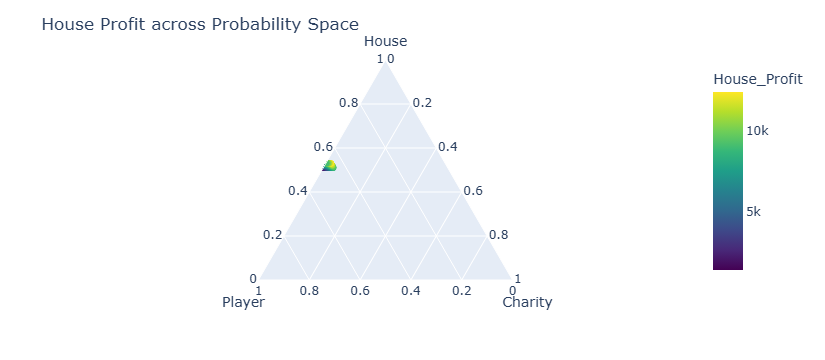

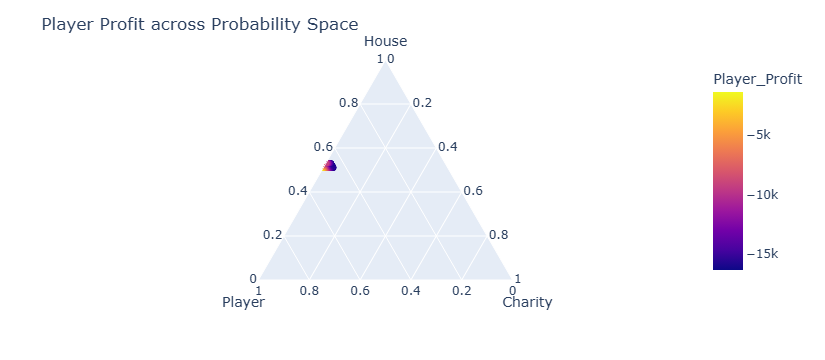

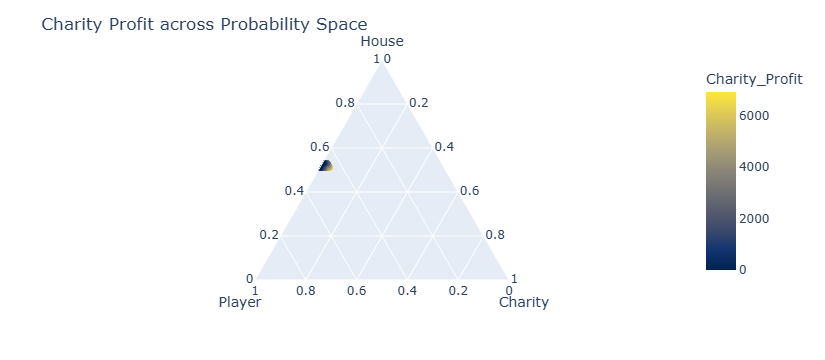

In [16]:
# Create DataFrame
df = pd.DataFrame(prob_list, columns=["House", "Player", "Charity", "Jackpot"])

# Add profit columns
df["House_Profit"] = house_ci_lower
df["Player_Profit"] = player_ci_upper
df["Charity_Profit"] = charity_ci_lower

# Ternary Plot: House Profit
fig_house = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["House_Profit"].abs(),
    color="House_Profit",
    hover_data=["House_Profit"],
    color_continuous_scale="Viridis",
)
fig_house.update_layout(title="House Profit across Probability Space")
fig_house.show()
fig_house.write_html("tri_HP1.html")

# Ternary Plot: Player Profit
fig_player = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["Player_Profit"].abs(),
    color="Player_Profit",
    hover_data=["Player_Profit"],
    color_continuous_scale="Plasma",
)
fig_player.update_layout(title="Player Profit across Probability Space")
fig_player.show()
fig_player.write_html("tri_PP1.html")

# Ternary Plot: Charity Profit
fig_charity = px.scatter_ternary(
    df,
    a="House", b="Player", c="Charity",
    #size=df["Charity_Profit"].abs(),
    color="Charity_Profit",
    hover_data=["Charity_Profit"],
    color_continuous_scale="Cividis",
)
fig_charity.update_layout(title="Charity Profit across Probability Space")
fig_charity.show()

fig_charity.write_html("tri_CP1.html")

In [21]:
prob_list = [] # Initialise list of probabilities
step = 0.001 # Set step value
p1_values = np.arange(0.51, 0.53 + step, step)

for p1 in p1_values:
    # p2 must be between 0.45 and min(p1, 1-p1, 0.55)
    max_p2 = min(0.55, p1, 1 - p1)
    min_p2 = 0.47
    p2_values = np.arange(min_p2, max_p2 + step, step)
    
    for p2 in p2_values:
        p3 = 0.0
        p4 = round(1 - (p1 + p2 + p3), 5)
        
        # Apply constraints
        if p4 >= 0 and p4 <= 0.002:
            if p1 > (p2 + p4) + 0.02:
                prob_list.append([round(p1, 4), round(p2, 4), p3, p4])

outcomes = ["house", "player", "charity", "jackpot"]
probabilities = prob_list  # Outcome probabilities
num_rounds = 3  # How number of rounds affects p/l
num_players = 10000  # Number of players per round
num_simulations = 100  # Number of Monte Carlo runs

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(prob_list)))
player_value = np.zeros((num_simulations, len(prob_list)))
charity_value = np.zeros((num_simulations, len(prob_list)))

for sim in range(num_simulations):
    for r_idx, probs in enumerate(prob_list):
        # Fixed number of rounds
        bet_vals = np.random.uniform(2, 10, (num_rounds, num_players)).round(2)
        # Define jackpot amount
        jackpot_vals = bet_vals * 10
        # Generate outcomes
        outcomes_idx = np.random.choice(len(outcomes), size=(num_rounds, num_players), p=probs)

        # Profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2)
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 2].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Statistics for charity_value
charity_mean = np.mean(charity_value, axis=0).tolist()
charity_sd = np.std(charity_value, axis=0).tolist()
charity_var = np.var(charity_value, axis=0).tolist()
charity_ci_lower = np.percentile(charity_value, 2.5, axis=0)
charity_ci_upper = np.percentile(charity_value, 97.5, axis=0)

p1_vals = [p[0] for p in prob_list]  # house probability
p2_vals = [p[1] for p in prob_list]  # player probability

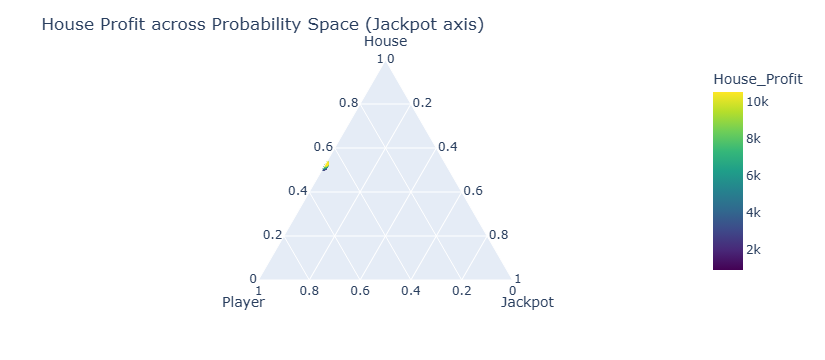

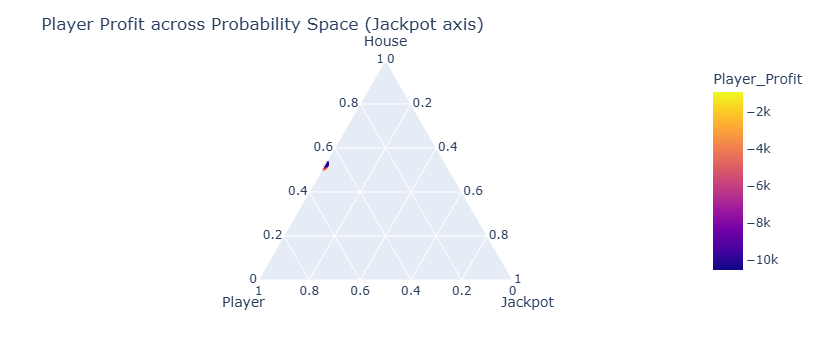

In [22]:
# Create DataFrame
df = pd.DataFrame(prob_list, columns=["House", "Player", "Charity", "Jackpot"])

# Add profit columns
df["House_Profit"] = house_mean
df["Player_Profit"] = player_mean
df["Charity_Profit"] = charity_mean

# Ternary plot house profit (House, Player, Jackpot) 
fig_house = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped Charity → Jackpot
    #size=df["House_Profit"].abs(),
    color="House_Profit",
    hover_data=["House_Profit", "Charity"],  # keep Charity in hover if you still want to inspect
    color_continuous_scale="Viridis",
)
fig_house.update_layout(title="House Profit across Probability Space (Jackpot axis)")
fig_house.show()

# Ternary plot player profit (House, Player, Jackpot) 
fig_player = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped
    #size=df["Player_Profit"].abs(),
    color="Player_Profit",
    hover_data=["Player_Profit", "Charity"],
    color_continuous_scale="Plasma",
)
fig_player.update_layout(title="Player Profit across Probability Space (Jackpot axis)")
fig_player.show()

In [17]:
prob_list = []
step = 0.0002
p1_values = np.arange(0.51, 0.53 + step, step)

for p1 in p1_values:
    # p2 must be between 0.45 and min(p1, 1-p1, 0.55)
    max_p2 = min(0.55, p1, 1 - p1)
    min_p2 = 0.47
    p2_values = np.arange(min_p2, max_p2 + step, step)
    
    for p2 in p2_values:
        p3 = 0.0
        p4 = round(1 - (p1 + p2 + p3), 5)
        
        # Apply constraints
        if p4 >= 0 and p4 <= 0.002:
            if p1 > (p2 + p4) + 0.02:
                prob_list.append([round(p1, 4), round(p2, 4), p3, p4])

outcomes = ["house", "player", "charity", "jackpot"]
probabilities = prob_list  # Outcome probabilities
num_rounds = 3  # How number of rounds affects p/l
num_players = 10000  # Number of players per round
num_simulations = 10  # Number of Monte Carlo runs

# Initialise arrays to track profit/loss
house_value = np.zeros((num_simulations, len(prob_list)))
player_value = np.zeros((num_simulations, len(prob_list)))
charity_value = np.zeros((num_simulations, len(prob_list)))

for sim in range(num_simulations):
    for r_idx, probs in enumerate(prob_list):
        # Fixed number of rounds
        bet_vals = np.random.uniform(1, 10, (num_rounds, num_players)).round(2)
        # Define jackpot value
        jackpot_vals = bet_vals * 10
        # Generate outcomes
        outcomes_idx = np.random.choice(len(outcomes), size=(num_rounds, num_players), p=probs)

        # Profit calculations
        house_profit = np.round(bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 1].sum(), 2)
        player_profit = np.round(bet_vals[outcomes_idx == 1].sum() - bet_vals[outcomes_idx == 0].sum() - bet_vals[outcomes_idx == 2].sum(), 2)
        charity_profit = np.round(bet_vals[outcomes_idx == 2].sum(), 2)

        # Jackpot adjustment
        jackpot_mask = (outcomes_idx == 3)
        jackpot_payout = jackpot_vals[jackpot_mask].sum()

        player_profit += np.round(jackpot_payout, 2)
        house_profit  -= np.round(jackpot_payout, 2)

        # Store results
        house_value[sim, r_idx] = house_profit
        player_value[sim, r_idx] = player_profit
        charity_value[sim, r_idx] = charity_profit

# Statistics for house_value
house_mean = np.mean(house_value, axis=0).tolist()
house_sd   = np.std(house_value, axis=0).tolist()
house_var  = np.var(house_value, axis=0).tolist()
house_ci_lower = np.percentile(house_value, 2.5, axis=0)  # 2.5th percentile
house_ci_upper = np.percentile(house_value, 97.5, axis=0) # 97.5th percentile

# Statistics for player_value
player_mean = np.mean(player_value, axis=0).tolist()
player_sd   = np.std(player_value, axis=0).tolist()
player_var  = np.var(player_value, axis=0).tolist()
player_ci_lower = np.percentile(player_value, 2.5, axis=0)
player_ci_upper = np.percentile(player_value, 97.5, axis=0)

# Statistics for charity_value
charity_mean = np.mean(charity_value, axis=0).tolist()
charity_sd = np.std(charity_value, axis=0).tolist()
charity_var = np.var(charity_value, axis=0).tolist()
charity_ci_lower = np.percentile(charity_value, 2.5, axis=0)
charity_ci_upper = np.percentile(charity_value, 97.5, axis=0)

p1_vals = [p[0] for p in prob_list]  # house probability
p2_vals = [p[1] for p in prob_list]  # player probability

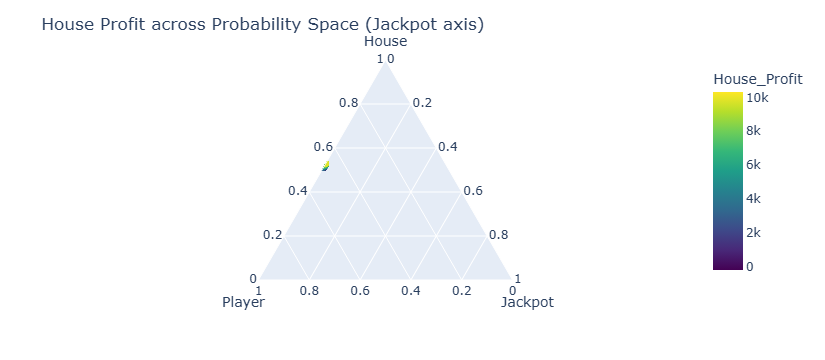

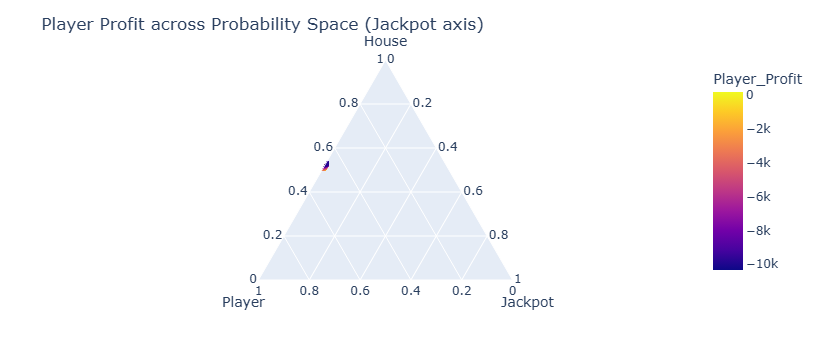

In [18]:
# Create DataFrame
df = pd.DataFrame(prob_list, columns=["House", "Player", "Charity", "Jackpot"])

# Add profit columns
df["House_Profit"] = house_mean
df["Player_Profit"] = player_mean
df["Charity_Profit"] = charity_mean

# Ternary plot house profit (House, Player, Jackpot) 
fig_house = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped Charity → Jackpot
    #size=df["House_Profit"].abs(),
    color="House_Profit",
    hover_data=["House_Profit", "Charity"],  # keep Charity in hover if you still want to inspect
    color_continuous_scale="Viridis",
)
fig_house.update_layout(title="House Profit across Probability Space (Jackpot axis)")
fig_house.show()

# Ternary plot player profit (House, Player, Jackpot) 
fig_player = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped
    #size=df["Player_Profit"].abs(),
    color="Player_Profit",
    hover_data=["Player_Profit", "Charity"],
    color_continuous_scale="Plasma",
)
fig_player.update_layout(title="Player Profit across Probability Space (Jackpot axis)")
fig_player.show()

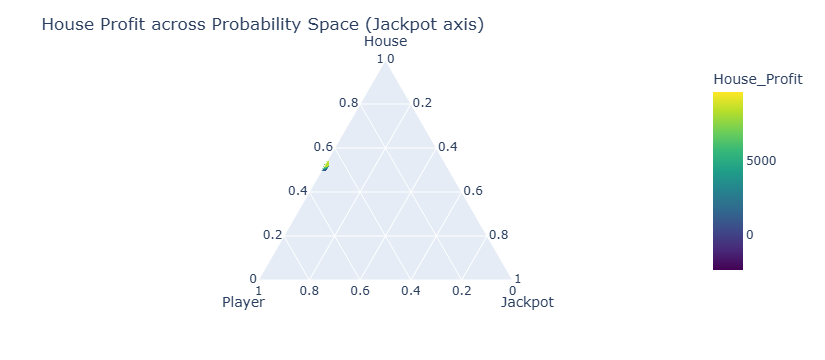

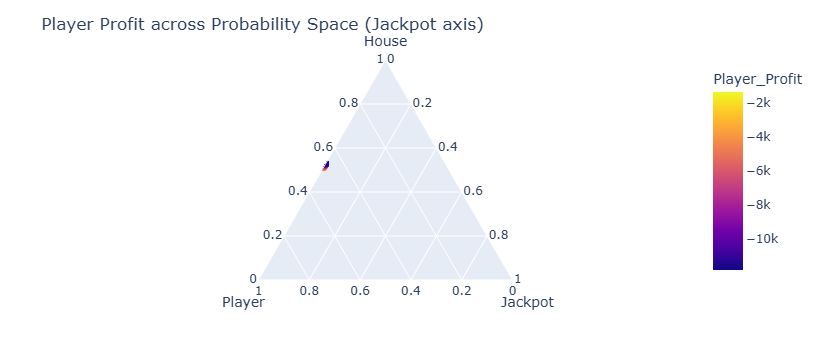

In [20]:
# Create DataFrame
df = pd.DataFrame(prob_list, columns=["House", "Player", "Charity", "Jackpot"])

# Add profit columns
df["House_Profit"] = house_ci_lower
df["Player_Profit"] = player_ci_lower
df["Charity_Profit"] = charity_mean

# Ternary plot house profit (House, Player, Jackpot) 
fig_house = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped Charity → Jackpot
    #size=df["House_Profit"].abs(),
    color="House_Profit",
    hover_data=["House_Profit", "Charity"],  # keep Charity in hover if you still want to inspect
    color_continuous_scale="Viridis",
)
fig_house.update_layout(title="House Profit across Probability Space (Jackpot axis)")
fig_house.show()

# Ternary plot player profit (House, Player, Jackpot) 
fig_player = px.scatter_ternary(
    df,
    a="House", b="Player", c="Jackpot",   # <-- swapped
    #size=df["Player_Profit"].abs(),
    color="Player_Profit",
    hover_data=["Player_Profit", "Charity"],
    color_continuous_scale="Plasma",
)
fig_player.update_layout(title="Player Profit across Probability Space (Jackpot axis)")
fig_player.show()